In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
sns.set_style("darkgrid")

import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 10

import plotly.graph_objects as go
import plotly.express as px

import pickle
import os
import gc

os.chdir("./제6회 L.POINT Big Data Competition/")

def resumetable(df):
    print(f"DataSet Shape : {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns={'dtypes'})
    summary = summary.reset_index()
    summary["Name"] = summary["index"]
    summary = summary[["Name","dtypes"]]
    summary['Missing'] = df.isnull().sum().values
    summary['Unique'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, "Entropy"] = round(stats.entropy(df[name].value_counts(normalize = True), base=2),2)
        
    return summary

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [2]:
online_df = pd.read_csv("merged_onilne_df.csv")
online_df = reduce_mem_usage(online_df)
online_df['time'] = pd.to_datetime(online_df.time)
online_df['hit_pss_tm'] = online_df.hit_pss_tm // 1000

Mem. usage decreased to 405.38 Mb (45.8% reduction)


#### 첫 방문에 구매하는 비율

In [12]:
with open('buying_sess_list.pickle', 'rb') as f:
    buying_sess_list = pickle.load(f)

In [11]:
tmp_df1 = online_df.drop_duplicates(["clnt_id","sess_id"], keep = "first").reset_index(drop = True)

In [13]:
tmp_df1["is_buying"] = buying_sess_list

In [11]:
buying_clnt = tmp_df1[tmp_df1.is_buying == 1].clnt_id.unique()

In [14]:
tmp_df1[tmp_df1.clnt_id.isin(buying_clnt)].drop_duplicates(["clnt_id"], keep = "first")

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,trans_seq,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,is_buying
2,2,1,1,0,A03,20190728,23:35,39532,NaN,레쓰비,...,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
23,4,1,1,0,A01,20190826,10:32,48117,NaN,아소방 1 1,...,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1
34,9,1,1,3,A03,20190701,13:55,46021,NaN,NaN,...,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN,0
69,12,1,1,0,A01,20190718,10:08,5401,NaN,생수 2L,...,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN,1
78,17,1,1,3,A03,20190729,18:21,635132,NaN,NaN,...,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,0
84,19,1,1,6,A01,20190810,16:33,1377191,72882.0,NaN,...,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1
85,20,1,1,6,A01,20190731,20:40,624578,64923.0,NaN,...,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
90,22,1,1,0,A01,20190720,09:56,7445,NaN,에어맥스,...,-1.0,-1,-1.0,-1.0,M,30,NaN,NaN,NaN,0
96,23,1,1,0,A01,20190706,12:02,23626,NaN,코데즈컴바인여성속옷,...,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN,1
117,24,1,1,3,A03,20190702,17:53,286423,NaN,NaN,...,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN,0


In [15]:
tmp_df1[tmp_df1.clnt_id.isin(buying_clnt)].drop_duplicates(["clnt_id"], keep = "first").shape[0]

(20833, 31)

In [17]:
tmp_df1[tmp_df1.clnt_id.isin(buying_clnt)].drop_duplicates(["clnt_id"], keep = "first").is_buying.sum()

10739

In [18]:
tmp_df1[tmp_df1.clnt_id.isin(buying_clnt)].drop_duplicates(["clnt_id"], keep = "first").is_buying.sum() / tmp_df1[tmp_df1.clnt_id.isin(buying_clnt)].drop_duplicates(["clnt_id"], keep = "first").shape[0]

0.5154802476839629

In [19]:
#구매자 중 첫 방문시 구매한 비율은 50%

In [21]:
# 첫 방문시 구매한 사람과 아닌 사람의 재방문 및 구매율?

In [25]:
first_visit_buying_id = tmp_df1[tmp_df1.clnt_id.isin(buying_clnt)].drop_duplicates(["clnt_id"], keep = "first")[tmp_df1[tmp_df1.clnt_id.isin(buying_clnt)].drop_duplicates(["clnt_id"], keep = "first").is_buying == 1].clnt_id.values

In [34]:
tmp_df1[tmp_df1.clnt_id.isin(first_visit_buying_id)].groupby("clnt_id").size().reset_index()[tmp_df1[tmp_df1.clnt_id.isin(first_visit_buying_id)].groupby("clnt_id").size().reset_index()[0] > 1].shape[0]

5156

In [37]:
tmp_df1[tmp_df1.clnt_id.isin(first_visit_buying_id)].groupby("clnt_id").size().reset_index()[tmp_df1[tmp_df1.clnt_id.isin(first_visit_buying_id)].groupby("clnt_id").size().reset_index()[0] > 1].shape[0] / len(first_visit_buying_id)

0.48011919173107365

In [38]:
# 첫방문 시 구매했을 경우 재방문율 약 48%

In [43]:
tmp_df1[tmp_df1.clnt_id.isin(first_visit_buying_id)].groupby("clnt_id").sum()["is_buying"].reset_index()[tmp_df1[tmp_df1.clnt_id.isin(first_visit_buying_id)].groupby("clnt_id").sum()["is_buying"].reset_index()['is_buying'] > 1].shape[0]

2910

In [44]:
tmp_df1[tmp_df1.clnt_id.isin(first_visit_buying_id)].groupby("clnt_id").sum()["is_buying"].reset_index()[tmp_df1[tmp_df1.clnt_id.isin(first_visit_buying_id)].groupby("clnt_id").sum()["is_buying"].reset_index()['is_buying'] > 1].shape[0] / len(first_visit_buying_id)

0.27097495111276654

In [45]:
# 첫방문 시 구매했을 경우 재구매율 약 27%

In [52]:
pd.options.display.max_columns = 50

In [49]:
buying_not_first_visit = tmp_df1[tmp_df1.clnt_id.isin(buying_clnt)].drop_duplicates(["clnt_id"], keep = "first")[tmp_df1[tmp_df1.clnt_id.isin(buying_clnt)].drop_duplicates(["clnt_id"], keep = "first").is_buying == 0].clnt_id.values

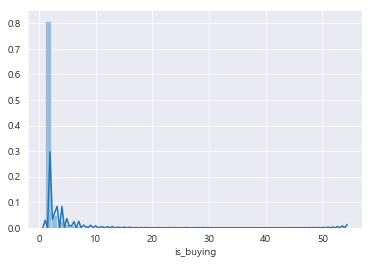

In [57]:
sns.distplot(tmp_df1[tmp_df1.clnt_id.isin(first_visit_buying_id)].groupby("clnt_id").sum()["is_buying"])

In [61]:
tmp_df1[tmp_df1.clnt_id.isin(first_visit_buying_id)].groupby("clnt_id").sum()["is_buying"].quantile([.1, .5, .75, .9, .95, .99])

0.10     1.0
0.50     1.0
0.75     2.0
0.90     3.0
0.95     5.0
0.99    12.0
Name: is_buying, dtype: float64

In [63]:
tmp_df1[tmp_df1.clnt_id.isin(first_visit_buying_id)].groupby("clnt_id").sum()["is_buying"].describe()

count    10739.000000
mean         1.793463
std          2.329688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         54.000000
Name: is_buying, dtype: float64

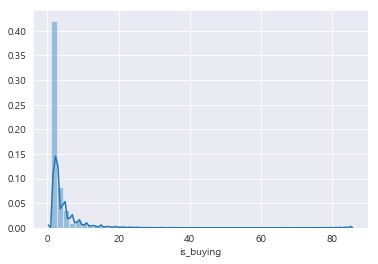

In [56]:
sns.distplot(tmp_df1[tmp_df1.clnt_id.isin(buying_not_first_visit)].groupby("clnt_id").sum()["is_buying"])

In [62]:
tmp_df1[tmp_df1.clnt_id.isin(buying_not_first_visit)].groupby("clnt_id").sum()["is_buying"].quantile([.1, .5, .75, .9, .95, .99])

0.10     1.0
0.50     1.0
0.75     3.0
0.90     6.0
0.95     9.0
0.99    19.0
Name: is_buying, dtype: float64

In [64]:
tmp_df1[tmp_df1.clnt_id.isin(buying_not_first_visit)].groupby("clnt_id").sum()["is_buying"].describe()

count    10094.000000
mean         2.788488
std          3.809459
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         85.000000
Name: is_buying, dtype: float64

In [69]:
# 첫 방문시 구매하지 않고 재방문시에 구매를 한 경우가 전체적인 재구매율이 더 높음

In [80]:
online_df[online_df.clac_nm1 == 'Vegetables'].drop_duplicates(["clnt_id","sess_id","clac_nm1","clac_nm2"], keep = "first").groupby(["clnt_id","clac_nm1","clac_nm2"]).size().reset_index().sort_values(by = 0, ascending = False).head(50).clac_nm2.value_counts()

Tofu / Bean Sprouts    18
Leaf Vegetables        15
Fruit Vegetables       12
Mushrooms               4
Western Vegetables      1
Name: clac_nm2, dtype: int64

In [85]:
online_df[(online_df.action_type == 6)&(online_df.clnt_gender == "F")].clac_nm1.value_counts()

Vegetables                                   10216
Meats                                         7269
Substitute Foods                              7109
Snack Foods                                   6790
Chilled Foods                                 6742
Dairy Products                                6734
Frozen Foods                                  5243
Fruits                                        4745
Beverages                                     4635
Spices / Seasonings                           3212
Detergents / Hygiene Goods                    2163
Canned / Jarred Foods                         1590
Women's Clothing                              1347
Dried Sea Foods                               1135
Personal Care                                 1082
Sea Foods                                      802
Grains                                         679
Fashion Accessories                            670
Cosmetics / Beauty Care                        632
Coffee / Tea                   

In [84]:
online_df[(online_df.action_type == 6)&(online_df.clnt_gender == "M")].clac_nm1.value_counts()

Vegetables                                   1027
Substitute Foods                              984
Meats                                         834
Snack Foods                                   804
Dairy Products                                762
Chilled Foods                                 743
Frozen Foods                                  728
Beverages                                     706
Fruits                                        624
Spices / Seasonings                           333
Detergents / Hygiene Goods                    251
Canned / Jarred Foods                         215
Dried Sea Foods                               113
Women's Clothing                              104
Personal Care                                  90
Sea Foods                                      87
Fashion Accessories                            79
Grains                                         74
Coffee / Tea                                   72
Sport Fashion                                  71


In [86]:
#남성과 여성간 전체적인 구매에 있어 category분포의 차이는 거의 없음

In [89]:
online_df[(online_df.action_type == 6)&(online_df.clnt_gender == "M")].drop_duplicates(["clnt_id"], keep = "first").clac_nm1.value_counts()

Fruits                                       67
Meats                                        57
Women's Clothing                             51
Fashion Accessories                          50
Vegetables                                   49
Sport Fashion                                42
Chilled Foods                                30
Substitute Foods                             29
Cosmetics / Beauty Care                      28
Frozen Foods                                 28
Dairy Products                               27
Beverages                                    25
Health Foods                                 23
Detergents / Hygiene Goods                   23
Men's Clothing                               21
Home / Kitchen Appliances                    18
Snack Foods                                  18
Underwear / Socks and Hosiery / Homewear     16
Canned / Jarred Foods                        15
Spices / Seasonings                          15
Computers                               

In [90]:
online_df[(online_df.action_type == 6)&(online_df.clnt_gender == "F")].drop_duplicates(["clnt_id"], keep = "first").clac_nm1.value_counts()

Fruits                                       532
Women's Clothing                             478
Vegetables                                   415
Meats                                        336
Cosmetics / Beauty Care                      319
Dairy Products                               254
Fashion Accessories                          249
Chilled Foods                                220
Sport Fashion                                180
Substitute Foods                             160
Underwear / Socks and Hosiery / Homewear     150
Frozen Foods                                 146
Beverages                                    135
Detergents / Hygiene Goods                   131
Health Foods                                 128
Snack Foods                                  128
Personal Care                                125
Grains                                        94
Spices / Seasonings                           92
Bedding / Handicraft                          72
Others (Non-Products

In [91]:
# 남성과 여성간에 첫 구매에 있어서는 category의 차이가 어느정도 보임

####  Search Rate

In [96]:
search_num = online_df[~online_df.sech_kwd.isnull()].groupby('clnt_id').size().reset_index()

In [97]:
search_num.columns = ["clnt_id", "search_count"]

In [103]:
search_to_buy = search_num.merge(tmp_df1.groupby('clnt_id').sum()[["is_buying"]].reset_index())

In [107]:
search_to_buy[["search_count","is_buying"]].corr()

,search_count,is_buying
search_count,1.000000,0.579644
is_buying,0.579644,1.000000


<Figure size 864x432 with 0 Axes>

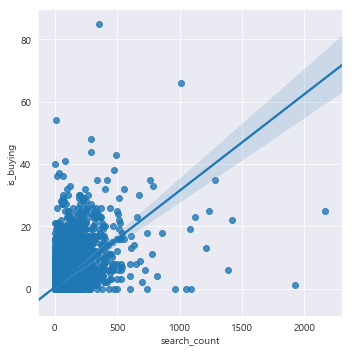

In [110]:
plt.figure(figsize = (12,6))
sns.lmplot(data=search_to_buy, x = "search_count", y="is_buying", )

In [111]:
# search_count와 구매횟수와는 꽤 높은 상관관계를 가지고 있음

In [116]:
# Session내에서 검색이 차지하는 비중과 그에 따른 구매율

In [133]:
search_rate_df = online_df[online_df.action_type.isin([0,1,2,3,4,6])].groupby(["clnt_id","sess_id","action_type"]).size().reset_index()

In [134]:
search_rate_df.rename(columns={0 : "count"}, inplace = True)

In [135]:
search_rate_df_2 = search_rate_df.merge(search_rate_df.groupby(["clnt_id","sess_id"]).sum()['count'].reset_index().rename(columns = {"count" : "tot_count"}),
                     how = "left", on = ["clnt_id","sess_id"])

In [6]:
search_rate_df_2['search_rate'] = search_rate_df_2['count'] / search_rate_df_2.tot_count

In [7]:
search_rate_df_2 = search_rate_df_2.merge(tmp_df1[["clnt_id","sess_id","is_buying"]], how = "left")

NameError: name 'tmp_df1' is not defined

In [10]:
search_rate_df_2 = search_rate_df_2[search_rate_df_2.action_type == 0]

In [12]:
search_rate_df_2.to_csv("search_rate.csv", index = False)

In [154]:
#결제시도를 제외한 action_type의 count중 search의 rate가 약 15~40%정도일때 구매할 확률이 높음

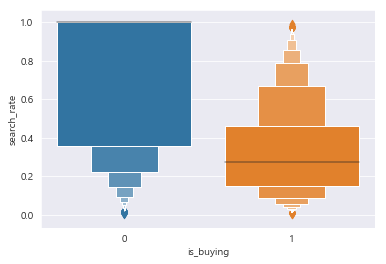

In [156]:
sns.boxenplot(y = search_rate_df_2[search_rate_df_2.action_type == 0].search_rate, x = search_rate_df_2[search_rate_df_2.action_type == 0].is_buying)

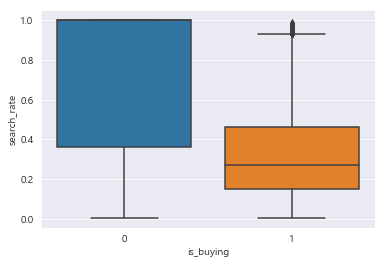

In [157]:
sns.boxplot(y = search_rate_df_2[search_rate_df_2.action_type == 0].search_rate, x = search_rate_df_2[search_rate_df_2.action_type == 0].is_buying)

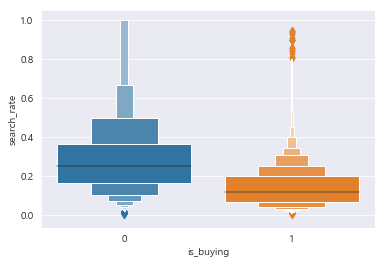

In [158]:
sns.boxenplot(y = search_rate_df_2[search_rate_df_2.action_type == 1].search_rate, x = search_rate_df_2[search_rate_df_2.action_type == 1].is_buying)

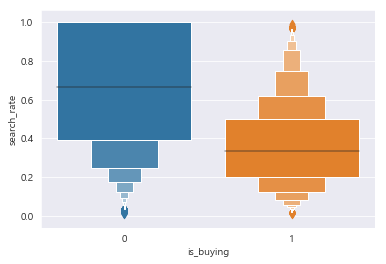

In [163]:
sns.boxenplot(data = search_rate_df_2[search_rate_df_2.action_type.isin([0,1])].groupby(["clnt_id","sess_id"]).sum()["search_rate"].reset_index().merge(tmp_df1[["clnt_id","sess_id","is_buying"]], how = "left"),
             x = "is_buying", y="search_rate")

In [162]:
search_rate_df_2[search_rate_df_2.action_type.isin([0,1])].groupby(["clnt_id","sess_id"]).sum()["search_rate"].reset_index().merge(tmp_df1[["clnt_id","sess_id","is_buying"]], how = "left")

,clnt_id,sess_id,search_rate,is_buying
0,1,1,1.000000,0
1,1,2,1.000000,0
2,2,1,0.590909,1
3,2,4,1.000000,0
4,2,7,0.400000,0
5,2,8,0.387755,1
6,2,9,0.500000,0
7,2,10,0.444444,1
8,2,12,1.000000,0
9,2,13,0.500000,0


In [53]:
search_rate_df_2

,clnt_id,sess_id,action_type,count,tot_count,search_rate,is_buying
0,1,1,0,3,3,1.000000,0
1,1,2,0,7,7,1.000000,0
2,2,1,0,7,22,0.318182,1
3,2,1,1,6,22,0.272727,1
4,2,1,2,6,22,0.272727,1
5,2,1,3,2,22,0.090909,1
6,2,1,6,1,22,0.045455,1
7,2,2,2,4,4,1.000000,0
8,2,3,3,1,1,1.000000,0
9,2,4,1,1,1,1.000000,0


In [52]:
search_rate_df_2[search_rate_df_2.action_type == 2][["count","search_rate","is_buying"]].corr()

,count,search_rate,is_buying
count,1.000000,-0.184637,0.199014
search_rate,-0.184637,1.000000,-0.344423
is_buying,0.199014,-0.344423,1.000000


In [51]:
search_rate_df_2[search_rate_df_2.action_type == 2][["tot_count","search_rate","is_buying"]]

,tot_count,search_rate,is_buying
4,22,0.272727,1
7,4,1.000000,0
12,5,0.400000,0
16,49,0.326531,1
21,6,0.500000,0
24,9,0.333333,1
27,2,1.000000,0
31,4,0.250000,0
35,4,0.250000,0
39,22,0.363636,0


In [145]:
search_rate_df_2

,clnt_id,sess_id,action_type,count,tot_count,search_rate,is_buying
0,1,1,0,3,3,1.000000,0
1,1,2,0,7,7,1.000000,0
2,2,1,0,7,22,0.318182,1
3,2,1,1,6,22,0.272727,1
4,2,1,2,6,22,0.272727,1
5,2,1,3,2,22,0.090909,1
6,2,1,6,1,22,0.045455,1
7,2,2,2,4,4,1.000000,0
8,2,3,3,1,1,1.000000,0
9,2,4,1,1,1,1.000000,0


In [ ]:
# 7-1 ~ 9-30

In [177]:
online_df['time'] = pd.to_datetime(online_df.time)

In [180]:
(online_df.drop_duplicates("clnt_id", keep = "first").time[0] - online_df.drop_duplicates("clnt_id", keep = "first").time.min()).days

72

In [190]:
online_df.drop_duplicates("clnt_id", keep = "first").time.max()

Timestamp('2019-09-30 23:55:00')

In [191]:
import time

In [192]:
pd.to_datetime("2019-10-01")

Timestamp('2019-10-01 00:00:00')

In [194]:
pass_tm = online_df.drop_duplicates("clnt_id", keep = "first").time - pd.to_datetime("2019-10-01")

In [204]:
first_visit = online_df.drop_duplicates("clnt_id", keep = "first")[["clnt_id"]]
first_visit = pd.concat([first_visit, pd.DataFrame(np.abs(pass_tm.apply(lambda x: x.days)))], axis=1)

In [214]:
first_visit.rename(columns={"time" : "time_to_last"}, inplace = True)

In [218]:
tmp_df1 = tmp_df1.merge(first_visit, how = "left", on = "clnt_id")

In [222]:
tmp_df1.groupby("clnt_id").sum()["is_buying"].reset_index().merge(first_visit, how = "left", on = "clnt_id")[["is_buying","time_to_last"]].corr()

,is_buying,time_to_last
is_buying,1.000000,0.208992
time_to_last,0.208992,1.000000


In [224]:
pass_tm_with_buy_cnt = tmp_df1.groupby("clnt_id").sum()["is_buying"].reset_index().merge(first_visit, how = "left", on = "clnt_id")

In [205]:
pd.DataFrame(np.abs(pass_tm.apply(lambda x: x.days)))

,time
0,20
10,65
265,78
275,36
277,43
278,83
323,88
338,21
340,92
624,88


In [226]:
pass_tm_with_buy_cnt["case"]  = np.where(pass_tm_with_buy_cnt.time_to_last <= 30, 1,
                                        np.where(pass_tm_with_buy_cnt.time_to_last <= 60, 2, 3))

In [228]:
pass_tm_with_buy_cnt.groupby("case").describe()["is_buying"]

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
1,16660.0,0.253601,0.553925,0.0,0.0,0.0,0.0,8.0
2,18948.0,0.343994,0.896085,0.0,0.0,0.0,0.0,24.0
3,36791.0,0.996548,2.646124,0.0,0.0,0.0,1.0,85.0


In [236]:
pass_tm_with_buy_cnt.groupby("case").quantile([.7, .8, .9, .95, .99])[["is_buying"]].reset_index()

,case,level_1,is_buying
0,1,0.70,0.0
1,1,0.80,1.0
2,1,0.90,1.0
3,1,0.95,1.0
4,1,0.99,2.0
5,2,0.70,0.0
6,2,0.80,1.0
7,2,0.90,1.0
8,2,0.95,2.0
9,2,0.99,4.0


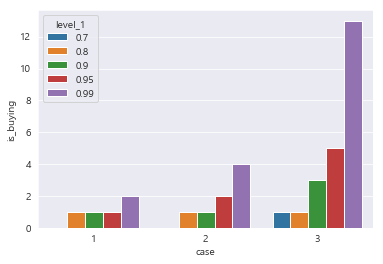

In [237]:
sns.barplot(data = pass_tm_with_buy_cnt.groupby("case").quantile([.7, .8, .9, .95, .99])[["is_buying"]].reset_index(),
           x = "case", y="is_buying", hue = "level_1")

In [233]:
pass_tm_with_buy_cnt[["is_buying"]].quantile([.7, .8, .9, .95, .99])

,is_buying
0.70,0.0
0.80,1.0
0.90,2.0
0.95,3.0
0.99,9.0


#### 접속횟수 및 접속주기

In [240]:
tmp_df11= tmp_df1[["clnt_id","sess_id","time"]]

In [251]:
tmp_df11['time'] = pd.to_datetime(tmp_df11.time)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [254]:
tmp_df11

,clnt_id,sess_id,time
0,1,1,2019-09-11 16:14:00
1,1,2,2019-09-22 14:09:00
2,2,1,2019-07-28 23:35:00
3,2,2,2019-07-29 07:27:00
4,2,3,2019-07-29 09:07:00
5,2,4,2019-07-29 09:55:00
6,2,5,2019-07-29 16:06:00
7,2,6,2019-07-30 23:23:00
8,2,7,2019-07-31 18:35:00
9,2,8,2019-07-31 20:31:00


In [261]:
tmp_df11.time[0] - tmp_df1.time.shift().fillna(method = "bfill")[0]

TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'

In [264]:
tmp_df11["time_pss_from_previous_sess"] = tmp_df11.time - pd.to_datetime(tmp_df1.time.shift().fillna(method = "bfill"))

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [269]:
(tmp_df11.clnt_id - tmp_df11.clnt_id.shift().fillna(1)).reset_index()[(tmp_df11.clnt_id - tmp_df11.clnt_id.shift().fillna(1)).reset_index().clnt_id != 0].index

Int64Index([     2,     22,     23,     24,     25,     27,     32,     34,
                67,     68,
            ...
            367127, 367129, 367131, 367132, 367133, 367135, 367138, 367139,
            367143, 367148],
           dtype='int64', length=72398)

In [276]:
tmp_df11['time_pss_from_previous_sess'] = tmp_df11.time_pss_from_previous_sess.apply(lambda x : x.days)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [278]:
tmp_df11.iloc[(tmp_df11.clnt_id - tmp_df11.clnt_id.shift().fillna(1)).reset_index()[(tmp_df11.clnt_id - tmp_df11.clnt_id.shift().fillna(1)).reset_index().clnt_id != 0].index,-1] = 0

c:\python37\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [303]:
tmp_df1 = tmp_df1.merge(tmp_df11[["clnt_id","sess_id","time_pss_from_previous_sess"]], how = "left")

In [285]:
tmp_1 = tmp_df11[["clnt_id","time_pss_from_previous_sess"]].groupby("clnt_id").aggregate(["count","sum"])["time_pss_from_previous_sess"].reset_index()

In [287]:
tmp_1["mean_pss_time"] = 0

In [295]:
tmp_1.loc[tmp_1['count']!=1, "mean_pss_time"] = tmp_1.loc[tmp_1['count']!=1, "sum"]/(tmp_1.loc[tmp_1['count']!=1, "count"]-1)

In [307]:
tmp_df1.merge(tmp_1[["clnt_id","mean_pss_time"]], how = "left")

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,time,year,month,day,weekday,hour,min,trans_seq,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,is_buying,time_to_last,time_pss_from_previous_sess,mean_pss_time
0,1,1,1,0,A01,20190911,16:14,11880,NaN,과일선물세트,14.0,124.0,unknown,mobile_app,2019-09-11 16:14:00,2019,9,11,2,16,14,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,0,20,0,10.000000
1,1,2,1,0,A01,20190922,14:09,41584,NaN,초등가을잠바,45.0,424.0,unknown,mobile_app,2019-09-22 14:09:00,2019,9,22,6,14,9,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,0,20,10,10.000000
2,2,1,1,0,A03,20190728,23:35,39532,NaN,레쓰비,55.0,872.0,DIRECT,NaN,2019-07-28 23:35:00,2019,7,28,6,23,35,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1,65,0,1.526316
3,2,2,1,5,A03,20190729,07:27,13980,NaN,NaN,12.0,134.0,DIRECT,NaN,2019-07-29 07:27:00,2019,7,29,0,7,27,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,0,65,0,1.526316
4,2,3,1,5,A03,20190729,09:07,60986,NaN,NaN,12.0,942.0,DIRECT,NaN,2019-07-29 09:07:00,2019,7,29,0,9,7,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,0,65,0,1.526316
5,2,4,1,1,A03,20190729,09:55,4019,NaN,NaN,22.0,1803.0,DIRECT,NaN,2019-07-29 09:55:00,2019,7,29,0,9,55,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,0,65,0,1.526316
6,2,5,1,5,A03,20190729,16:06,2661,NaN,NaN,2.0,8.0,DIRECT,NaN,2019-07-29 16:06:00,2019,7,29,0,16,6,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,0,65,0,1.526316
7,2,6,1,5,A03,20190730,23:23,14982,NaN,NaN,4.0,24.0,DIRECT,NaN,2019-07-30 23:23:00,2019,7,30,1,23,23,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,0,65,1,1.526316
8,2,7,1,0,A03,20190731,18:35,90972,NaN,레쓰비,7.0,108.0,DIRECT,NaN,2019-07-31 18:35:00,2019,7,31,2,18,35,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,0,65,0,1.526316
9,2,8,1,5,A03,20190731,20:31,2184,NaN,NaN,85.0,3256.0,DIRECT,NaN,2019-07-31 20:31:00,2019,7,31,2,20,31,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1,65,0,1.526316


In [308]:
tmp_df1.merge(tmp_1[["clnt_id","mean_pss_time"]], how = "left").columns

Index(['clnt_id', 'sess_id', 'hit_seq', 'action_type', 'biz_unit', 'sess_dt',
       'hit_tm', 'hit_pss_tm', 'trans_id', 'sech_kwd', 'tot_pag_view_ct',
       'tot_sess_hr_v', 'trfc_src', 'dvc_ctg_nm', 'time', 'year', 'month',
       'day', 'weekday', 'hour', 'min', 'trans_seq', 'pd_c', 'buy_am',
       'buy_ct', 'clnt_gender', 'clnt_age', 'clac_nm1', 'clac_nm2', 'clac_nm3',
       'is_buying', 'time_to_last', 'time_pss_from_previous_sess',
       'mean_pss_time'],
      dtype='object')

In [310]:
train = tmp_df1.merge(tmp_1[["clnt_id","mean_pss_time"]], how = "left")[["biz_unit","tot_pag_view_ct","tot_sess_hr_v", "trfc_src","dvc_ctg_nm","weekday","hour","is_buying","time_to_last","time_pss_from_previous_sess","mean_pss_time"]]

In [367]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

In [316]:
for col in train.select_dtypes(include = 'O').columns:
    le = LabelEncoder()
    le_trans = le.fit_transform(train[col].fillna("unknown"))
    train.loc[:,col] = le_trans

In [320]:
X = train.drop("is_buying", axis=1)
y = train.is_buying

In [321]:
kf = KFold(n_splits=5, random_state=42)

In [322]:
import lightgbm as lgb

In [323]:
oof = np.zeros(len(y))

In [356]:
lgb_params = {
    'objective' : "binary",
    'metric' : 'auc',
    'learning_rate' : 0.01
}

In [358]:
for (train_idx, valid_idx) in kf.split(X):
    train_X, valid_X = X.iloc[train_idx,:], X.iloc[valid_idx,:]
    train_y, valid_y = y[train_idx], y[valid_idx]
    
    Dtrain = lgb.Dataset(train_X, label=train_y)
    Dvalid = lgb.Dataset(valid_X, label=valid_y)
    
    model = lgb.train(lgb_params, Dtrain, 1000, valid_sets=[Dtrain,Dvalid], early_stopping_rounds=300,verbose_eval=50)
    
    oof[valid_idx] = model.predict(valid_X)

Training until validation scores don't improve for 300 rounds.
[50]	training's auc: 0.855418	valid_1's auc: 0.831942
[100]	training's auc: 0.859022	valid_1's auc: 0.835682
[150]	training's auc: 0.862384	valid_1's auc: 0.8385
[200]	training's auc: 0.864483	valid_1's auc: 0.84046
[250]	training's auc: 0.866183	valid_1's auc: 0.841789
[300]	training's auc: 0.867951	valid_1's auc: 0.843013
[350]	training's auc: 0.869446	valid_1's auc: 0.844173
[400]	training's auc: 0.870748	valid_1's auc: 0.845078
[450]	training's auc: 0.871798	valid_1's auc: 0.84571
[500]	training's auc: 0.872887	valid_1's auc: 0.846226
[550]	training's auc: 0.873839	valid_1's auc: 0.846617
[600]	training's auc: 0.874624	valid_1's auc: 0.847074
[650]	training's auc: 0.875301	valid_1's auc: 0.847341
[700]	training's auc: 0.875892	valid_1's auc: 0.847483
[750]	training's auc: 0.876476	valid_1's auc: 0.847595
[800]	training's auc: 0.877073	valid_1's auc: 0.847636
[850]	training's auc: 0.87764	valid_1's auc: 0.847696
[900]	tr

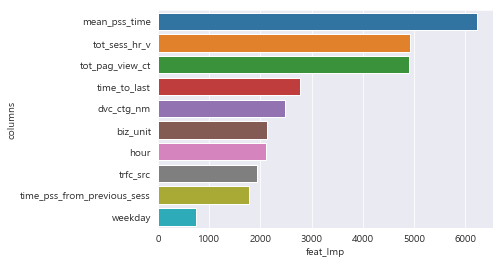

In [382]:
sns.barplot(data = pd.DataFrame({"columns" : train_X.columns,"feat_Imp":model.feature_importance()}).sort_values(by = "feat_Imp", ascending = False),
       x = "feat_Imp", y = "columns")

In [359]:
precision_score(y, np.round(oof))

0.5994419469849636

In [376]:
confusion_matrix(y, np.where(oof>0.5,1,0))

array([[311990,   7752],
       [ 35806,  11601]], dtype=int64)

In [375]:
f1_score(y, np.where(oof>0.5,1,0))

0.3475434391851408

In [386]:
train

,biz_unit,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,weekday,hour,is_buying,time_to_last,time_pss_from_previous_sess,mean_pss_time
0,0,14.0,124.0,6,1,2,16,0,20,0,10.000000
1,0,45.0,424.0,6,1,6,14,0,20,10,10.000000
2,2,55.0,872.0,0,3,6,23,1,65,0,1.526316
3,2,12.0,134.0,0,3,0,7,0,65,0,1.526316
4,2,12.0,942.0,0,3,0,9,0,65,0,1.526316
5,2,22.0,1803.0,0,3,0,9,0,65,0,1.526316
6,2,2.0,8.0,0,3,0,16,0,65,0,1.526316
7,2,4.0,24.0,0,3,1,23,0,65,1,1.526316
8,2,7.0,108.0,0,3,2,18,0,65,0,1.526316
9,2,85.0,3256.0,0,3,2,20,1,65,0,1.526316


In [4]:
timedelta_df = pd.read_csv("data_about_timedelta.csv")

In [22]:
tmp_df = search_rate_df_2.merge(timedelta_df, how = "left", on = ["clnt_id","sess_id"])

In [30]:
tmp_df[tmp_df.action_type.isin([0,1])].groupby("clnt_id").agg(['min',"mean","max"])[["search_rate","is_buying"]]

search_rate                     is_buying              
                min      mean       max       min      mean max
clnt_id                                                        
1          1.000000  1.000000  1.000000         0  0.000000   0
2          0.062500  0.401873  1.000000         0  0.333333   1
3          1.000000  1.000000  1.000000         0  0.000000   0
4          0.500000  0.500000  0.500000         1  1.000000   1
6          0.068966  0.354885  0.666667         0  0.000000   0
7          0.250000  0.625000  1.000000         0  0.000000   0
8          1.000000  1.000000  1.000000         0  0.000000   0
9          0.052632  0.336529  1.000000         0  0.125000   1
10         1.000000  1.000000  1.000000         0  0.000000   0
11         1.000000  1.000000  1.000000         0  0.000000   0
12         0.500000  0.500000  0.500000         1  1.000000   1
13         1.000000  1.000000  1.000000         0  0.000000   0
14         1.000000  1.000000  1.000000         0  0.000000   0
16         1.000000  1.000000  1.000000         0  0.000000   0
17         0.062500  0.152110  0.285714         0  0.400000   1
18         1.000000  1.000000  1.000000         0  0.000000   0
21         1.000000  1.000000  1.000000         0  0.000000   0
22         0.750000  0.958333  1.000000         0  0.166667   1
23         0.800000  0.968627  1.000000         0  0.176471   1
24         0.034483  0.397969  1.000000         0  0.307692   1
25         1.000000  1.000000  1.000000         0  0.000000   0
26         1.000000  1.000000  1.000000         0  0.000000   0
27         1.000000  1.000000  1.000000         0  0.000000   0
28         1.000000  1.000000  1.000000         0  0.000000   0
29         0.666667  0.979167  1.000000         0  0.062500   1
30         1.000000  1.000000  1.000000         0  0.000000   0
31         1.000000  1.000000  1.000000         0  0.000000   0
33         1.000000  1.000000  1.000000         0  0.000000   0
34         1.000000  1.000000  1.000000         0  0.000000   0
35         1.000000  1.000000  1.000000         0  0.000000   0
...             ...       ...       ...       ...       ...  ..
72379      0.250000  0.250000  0.250000         1  1.000000   1
72380      0.200000  0.200000  0.200000         0  0.000000   0
72381      0.750000  0.750000  0.750000         0  0.000000   0
72383      0.333333  0.555556  1.000000         0  0.000000   0
72395      0.166667  0.166667  0.166667         0  0.000000   0
72396      0.500000  0.500000  0.500000         0  0.000000   0
72397      1.000000  1.000000  1.000000         0  0.000000   0
72398      0.092308  0.184615  0.276923         0  0.000000   0
72400      0.111111  0.503704  1.000000         0  0.333333   1
72402      1.000000  1.000000  1.000000         0  0.000000   0
72403      1.000000  1.000000  1.000000         0  0.000000   0
72406      0.500000  0.500000  0.500000         0  0.000000   0
72407      0.600000  0.600000  0.600000         0  0.000000   0
72408      0.375000  0.375000  0.375000         0  0.000000   0
72409      0.500000  0.500000  0.500000         0  0.000000   0
72410      0.166667  0.277778  0.333333         0  0.333333   1
72411      0.333333  0.555556  1.000000         0  0.000000   0
72412      0.250000  0.250000  0.250000         0  0.000000   0
72414      0.192771  0.339357  0.500000         0  0.000000   0
72415      0.500000  0.500000  0.500000         0  0.000000   0
72417      1.000000  1.000000  1.000000         0  0.000000   0
72420      0.250000  0.250000  0.250000         0  0.000000   0
72421      1.000000  1.000000  1.000000         0  0.000000   0
72422      1.000000  1.000000  1.000000         0  0.000000   0
72424      0.142857  0.218237  0.340426         0  0.333333   1
72425      1.000000  1.000000  1.000000         0  0.000000   0
72426      0.250000  0.312500  0.375000         0  0.000000   0
72427      0.055556  0.222222  0.388889         1  1.000000   1
72428      1.000000  1.000000  1.000000 

In [32]:
pd.options.display.max_columns = 50

In [57]:
tmp_df2 = online_df.merge(tmp_df1[["clnt_id","sess_id",'is_buying']], how = "left", on = ["clnt_id","sess_id"])

In [61]:
tmp_df2[tmp_df2.is_buying == 1].drop_duplicates(["clnt_id","sess_id","action_type"], keep = "first")

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,time,year,month,day,weekday,hour,min,trans_seq,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,is_buying
10,2,1,1,0,A03,20190728,23:35,39,NaN,레쓰비,55.0,872.0,DIRECT,NaN,2019-07-28 23:35:00,2019,7,28,6,23,35,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
11,2,1,2,1,A03,20190728,23:35,47,NaN,NaN,55.0,872.0,DIRECT,NaN,2019-07-28 23:35:00,2019,7,28,6,23,35,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
12,2,1,3,2,A03,20190728,23:35,48,NaN,NaN,55.0,872.0,DIRECT,NaN,2019-07-28 23:35:00,2019,7,28,6,23,35,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
15,2,1,6,3,A03,20190728,23:36,127,NaN,NaN,55.0,872.0,DIRECT,NaN,2019-07-28 23:36:00,2019,7,28,6,23,36,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
16,2,1,7,5,A03,20190728,23:36,136,NaN,NaN,55.0,872.0,DIRECT,NaN,2019-07-28 23:36:00,2019,7,28,6,23,36,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
46,2,1,37,6,A03,20190728,23:47,791,62037.0,NaN,55.0,872.0,DIRECT,NaN,2019-07-28 23:47:00,2019,7,28,6,23,47,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
78,2,8,1,5,A03,20190731,20:31,2,NaN,NaN,85.0,3256.0,DIRECT,NaN,2019-07-31 20:31:00,2019,7,31,2,20,31,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
79,2,8,2,0,A03,20190731,20:31,7,NaN,초밥,85.0,3256.0,DIRECT,NaN,2019-07-31 20:31:00,2019,7,31,2,20,31,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
80,2,8,3,1,A03,20190731,20:32,34,NaN,NaN,85.0,3256.0,DIRECT,NaN,2019-07-31 20:32:00,2019,7,31,2,20,32,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
81,2,8,4,2,A03,20190731,20:32,36,NaN,NaN,85.0,3256.0,DIRECT,NaN,2019-07-31 20:32:00,2019,7,31,2,20,32,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1


In [68]:
timedelta = pd.read_csv("data_about_timedelta.csv")

In [69]:
timedelta.head()

,clnt_id,sess_id,time_to_last,time_pss_from_previous_sess,mean_pss_time
0,1,1,20,0,10.000000
1,1,2,20,10,10.000000
2,2,1,65,0,1.526316
3,2,2,65,0,1.526316
4,2,3,65,0,1.526316


In [70]:
last_access = online_df.drop_duplicates(["clnt_id"], keep = "last")[["clnt_id","time"]]

In [71]:
last_access.reset_index(drop = True, inplace=True)

In [72]:
last_access["last_access"] = np.abs((last_access.time - pd.to_datetime("20191001")).dt.days)

In [73]:
timedelta = timedelta.merge(last_access[["clnt_id","last_access"]], how = "left")

In [30]:
timedelta["time_range"] = timedelta.time_to_last - timedelta.last_access - 1

In [91]:
timedelta.to_csv("timedelta_data.csv", index = False)

In [22]:
timedelta.shape

(367149, 5)

In [76]:
tmp_time1 = timedelta.groupby(["clnt_id"]).size().reset_index()

In [77]:
tmp_time2 = timedelta.drop_duplicates(["clnt_id"], keep ="first").time_to_last - timedelta.drop_duplicates(["clnt_id"], keep ="first").last_access

In [78]:
tmp_time2.reset_index(drop = True, inplace = True)

In [79]:
tmp_time1["time_range"] = tmp_time2

In [81]:
(tmp_time1.loc[tmp_time1.time_range!=0,'time_range'] / tmp_time1.loc[tmp_time1.time_range!=0,0])

0         5.500000
1         1.750000
5        10.500000
6         9.000000
7         3.000000
8         2.606061
14        9.000000
15       15.000000
16        4.200000
20       19.000000
21       10.666667
22        3.857143
23        4.736842
24       10.500000
27       12.333333
28        0.750000
32       12.666667
34        0.666667
36        8.333333
37        1.333333
38        1.516667
39        6.333333
40        1.428571
41        8.100000
45        7.500000
47        1.271429
50        3.000000
51        2.333333
55        5.333333
56        4.000000
           ...    
72334     0.533333
72337     7.500000
72339     1.000000
72340     8.333333
72341    25.000000
72342     1.081081
72343     4.333333
72345    14.500000
72347     0.250000
72352     5.200000
72354     4.500000
72357     0.500000
72358    22.000000
72359    12.500000
72360     1.333333
72368     4.800000
72369     2.571429
72370     6.222222
72371    20.500000
72373     0.333333
72374     0.500000
72377    35.

In [82]:
tmp_time1.loc[tmp_time1.time_range!=0,"mean_access_term"] = (tmp_time1.loc[tmp_time1.time_range!=0,'time_range'] / tmp_time1.loc[tmp_time1.time_range!=0,0])

In [85]:
timedelta = timedelta.merge(tmp_time1[["clnt_id","mean_access_term"]], how = "left")

In [88]:
timedelta.head()

,clnt_id,sess_id,time_to_last,time_pss_from_previous_sess,mean_pss_time,last_access,mean_access_term
0,1,1,20,0,10.000000,9,5.50
1,1,2,20,10,10.000000,9,5.50
2,2,1,65,0,1.526316,30,1.75
3,2,2,65,0,1.526316,30,1.75
4,2,3,65,0,1.526316,30,1.75


In [89]:
timedelta.loc[timedelta.mean_access_term.isnull(), "mean_access_term"] = timedelta.loc[timedelta.mean_access_term.isnull(),"time_to_last"]

In [95]:
search_rate = pd.read_csv("search_rate.csv")

In [96]:
buying_sess = pd.read_csv("buying_sess_df.csv")

In [98]:
search_rate = search_rate.merge(buying_sess, how = "left")

In [105]:
tmp = search_rate.groupby(["clnt_id","buying_sess"]).aggregate(["mean","std"])["search_rate"].fillna(0).reset_index()

In [110]:
tmp_id = tmp.groupby(["clnt_id"]).size().reset_index()[tmp.groupby(["clnt_id"]).size().reset_index()[0] == 2].clnt_id

In [129]:
tmp[~tmp.clnt_id.isin(tmp_id)]

,clnt_id,buying_sess,mean,std
0,1,0,1.000000,0.000000
3,3,0,1.000000,0.000000
4,4,1,0.500000,0.000000
5,6,0,0.591954,0.105660
6,7,0,0.833333,0.288675
7,8,0,1.000000,0.000000
10,10,0,1.000000,0.000000
11,11,0,1.000000,0.000000
12,12,1,0.500000,0.000000
13,13,0,1.000000,0.000000


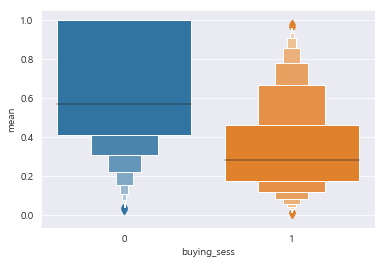

In [112]:
sns.boxenplot(data = tmp[tmp.clnt_id.isin(tmp_id)],
             x = "buying_sess", y = "mean")

In [117]:
tmp_id2 = online_df[online_df.action_type==6].clnt_id.unique()

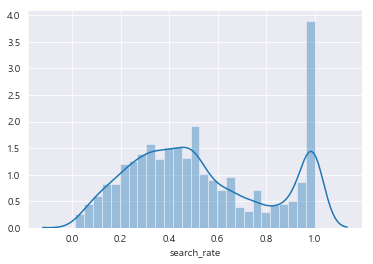

In [120]:
sns.distplot(search_rate[search_rate.clnt_id.isin(tmp_id2)].groupby("clnt_id").mean()["search_rate"])

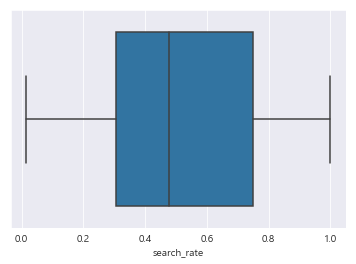

In [123]:
sns.boxplot(search_rate[search_rate.clnt_id.isin(tmp_id2)].groupby("clnt_id").mean()["search_rate"])

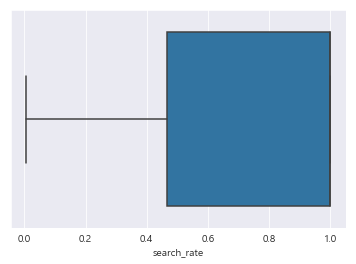

In [125]:
sns.boxplot(search_rate[~search_rate.clnt_id.isin(tmp_id2)].groupby("clnt_id").mean()["search_rate"])

In [140]:
search_rate[~search_rate.clnt_id.isin(tmp_id2)].search_rate.quantile([.1, .25, .5, .75, .9, .95])

0.10    0.25
0.25    0.50
0.50    1.00
0.75    1.00
0.90    1.00
0.95    1.00
Name: search_rate, dtype: float64

In [141]:
search_rate[search_rate.clnt_id.isin(tmp_id2)].search_rate.quantile([.1, .25, .5, .75, .9, .95])

0.10    0.133333
0.25    0.257576
0.50    0.500000
0.75    1.000000
0.90    1.000000
0.95    1.000000
Name: search_rate, dtype: float64

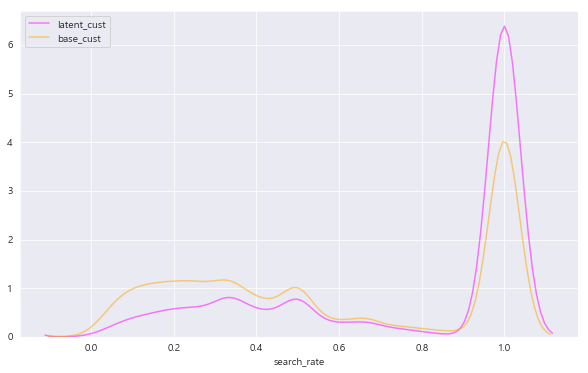

In [145]:
fig, ax = plt.subplots(figsize = (10,6))
sns.distplot(search_rate[~search_rate.clnt_id.isin(tmp_id2)].search_rate, hist=False, kde_kws={"alpha" : 0.5}, color = "magenta", ax = ax, label = "latent_cust")
sns.distplot(search_rate[search_rate.clnt_id.isin(tmp_id2)].search_rate, hist=False, kde_kws={"alpha" : 0.5}, color = "orange", ax = ax, label = "base_cust")

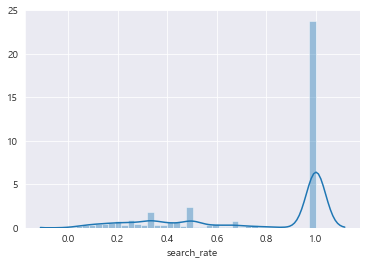

In [142]:
sns.distplot(search_rate[~search_rate.clnt_id.isin(tmp_id2)].search_rate)

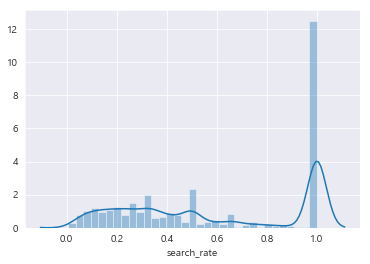

In [143]:
sns.distplot(search_rate[search_rate.clnt_id.isin(tmp_id2)].search_rate)